# Time Series

As an example of time series  we will be looking at weather data which is easily obtained.
The data set we will look at is from the 
Global Historical Climatology Network (GHCN): 2005-2015 New York Region

The data comes from http://www.ncdc.noaa.gov/cdo-web/datasets 

Air Temperature: (tenths of degrees Celsius)
* MNTM - Monthly mean temperature
* MMNT - Monthly Mean minimum temperature
* MMXT - Monthly Mean maximum temperature
* EMNT - Extreme minimum daily temperature
* EMXT - Extreme maximum daily temperature
    
Precipitation: (tenths of mm)
* TPCP - Total precipitation
* EMXP - Extreme maximum daily precipitation 
    
Snow: (mm)
* TSNW - Total snow fall
* MXSD - Maximum snow depth
    
Note that one of the great strengths of Pandas is time series. Pandas is particularly helpful.
Using version is not 0.23.4 here so keep that in mind.

In [1]:
# load pandas
import pandas as pd
# check the version
pd.__version__

'0.23.4'

In [2]:
# load in csv file of data from online and put it into the ghcn dataframe object
ghcn = pd.read_csv('https://raw.githubusercontent.com/story645/ams_tutorials/master/data/nyc_2005_2015.csv')

In [3]:
#view the first 5 rows of the data
ghcn.head()

In [4]:
#get data types and counts of variables
ghcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 11 columns):
STATION_NAME    1625 non-null object
DATE            1625 non-null int64
EMXP            1625 non-null int64
MXSD            1625 non-null int64
TPCP            1625 non-null int64
TSNW            1625 non-null int64
EMXT            1625 non-null int64
EMNT            1625 non-null int64
MMXT            1625 non-null int64
MMNT            1625 non-null int64
MNTM            1625 non-null int64
dtypes: int64(10), object(1)
memory usage: 139.7+ KB


In [5]:
#view column names
ghcn.columns

Index(['STATION_NAME', 'DATE', 'EMXP', 'MXSD', 'TPCP', 'TSNW', 'EMXT', 'EMNT',
       'MMXT', 'MMNT', 'MNTM'],
      dtype='object')

## Indexing

Pandas gives us different ways and great flexibility at indexing our data. We can create slices like in numpy. First we select the columns we want to index and then we can choose, for example, from the 6th row to the 15th row, skipping every other row.

In [6]:
ghcn[['MMNT','TSNW']][5:15:2]

Here we specify the same range/slice of rows and a range of column headings.

In [7]:
# use .loc for row, column order
ghcn.loc[5:15:2,'TSNW':'MNTM']

In [8]:
#use .iloc for numerical indexing on rows and cols
ghcn.iloc[5:15:2,5:10]

## Summary Statistics & Distributions

Pandas has a number of built in statistical functions, more than we find in pure bandas. We have min, max, mean, std, but there is also mean and quantile. 

In [9]:
ghcn['MMNT'].min(), ghcn['MMNT'].max(), ghcn['MMNT'].mean(), ghcn['MMNT'].median(), ghcn['MMNT'].quantile(.25)

(-9999, 239, -2825.9304615384617, 19.0, -9999.0)

In [10]:
import numpy as np
np.__version__

'1.15.3'

In [11]:
# mask missing values by replacing -9999 with np.nan
ghcn.replace(-9999,np.nan,inplace=True)

In [12]:
# Compute the summary statistics of the average temperature:
ghcn['TPCP'].describe()

count    1622.000000
mean      977.469174
std       665.199628
min         0.000000
25%       553.000000
50%       880.500000
75%      1250.000000
max      4813.000000
Name: TPCP, dtype: float64

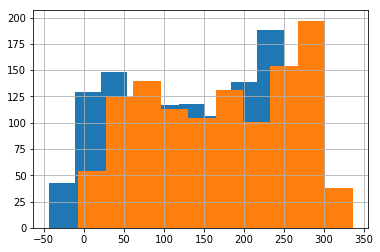

In [13]:
#use matplotlib inline to show the distribution
%matplotlib inline
# We will need this later
import matplotlib.pyplot as plt

# plot the histogram of the MNTM column and the MMXT column to compare them
ghcn['MNTM'].hist()
ghcn['MMXT'].hist()

Note that because the histograms are solid we cannot see through them. One way we can deal with this is to change the histogram type to 'step'. This just give us the outline. In order to show them on the same graph we explicitly create the 'axis' using subplots and pass it to each plot. We also use the 'label' attribute to identify each of the plots for use in the legend.

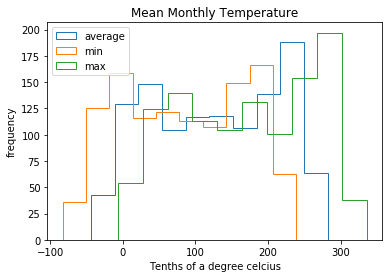

In [14]:
# plot the histogram of all three temperature variables
fig, ax = plt.subplots()
_ = ghcn['MNTM'].hist(histtype='step', ax=ax, label='average')
_ = ghcn['MMNT'].hist(histtype='step', ax=ax, label='min')
_ = ghcn['MMXT'].hist(histtype='step', ax=ax, label='max')
_ = ax.legend(loc='upper left')
_ = ax.set_title("Mean Monthly Temperature")
_ = ax.set_xlabel('Tenths of a degree celcius')
ax.set_ylabel('frequency')
ax.grid(False)

The histogram is an approximation to a probability density. The bin makes it a probability distribution (discrete bins) that approaches a probability density (continuous) as the bins get very small. We have two other ways of looking at it. The kde plot takes the data and by setting up effectively normal densities around each data point, approximates the smooth probability density of the data. The boxplot just gives the summary statistics in visual form showing the max, min, median, first and third quartile. In some ways by showing less, the box plot makes it easier to compare the overall stats better although the kde is better at showing the comparative shapes of the density.

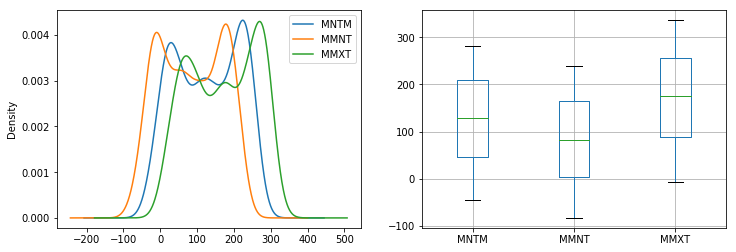

In [15]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,4), ncols=2)
_ = ghcn[['MNTM','MMNT','MMXT']].plot.kde(ax=ax1)
_ = ghcn[['MNTM','MMNT','MMXT']].boxplot(ax=ax2)


In [16]:
#summary for entire dataset
ghcn.describe()

Not all stations have the same number of measurements. Some stations are newer while others may have been retired. Lets see which stations have the longest time series in the data.

In [17]:
ghcn['STATION_NAME'].value_counts()

NEW YORK LAGUARDIA AIRPORT NY US                    121
WESTCHESTER CO AIRPORT NY US                        121
FARMINGDALE REPUBLIC AIRPORT NY US                  121
CENTERPORT NY US                                    121
NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US    121
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     121
BRONX NY US                                         101
MINEOLA NY US                                        83
DOBBS FERRY ARDSLEY NY US                            83
WANTAGH CEDAR CREEK NY US                            83
FLORAL PARK 0.4 W NY US                              81
STATEN ISLAND 4.5 SSE NY US                          60
OCEANSIDE NY US                                      57
LEVITTOWN 0.2 E NY US                                54
STATEN ISLAND 1.4 SE NY US                           41
MIDDLE VILLAGE 0.5 SW NY US                          39
NEW ROCHELLE 1.3 S NY US                             35
WEST NYACK 1.3 WSW NY US                        

This is nice but to see the pattern of value counts it would be much easier to represent this as a bar graph. We can do this with the bar chart built into Pandas.

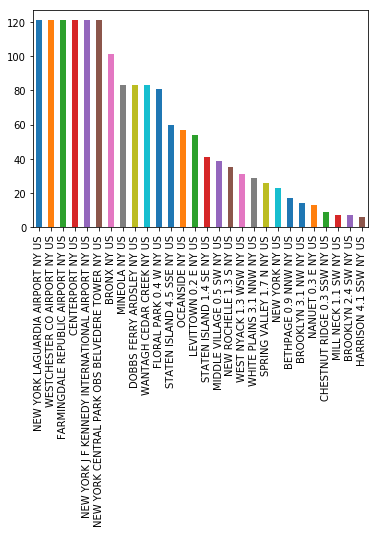

In [18]:
ghcn['STATION_NAME'].value_counts().plot.bar()

Harrison station looks particularly short on measurements. Let's have a look.

In [19]:
ghcn[ghcn['STATION_NAME'].str.contains('HARRISON')]

Definitely we can see Harrison station has view measurements and many NaN. Lets look at boxplots for all the stations but only the Monthly Mean Temperature distributions. Clearly as with Harrison there may be missing boxplots due to missing measurements.

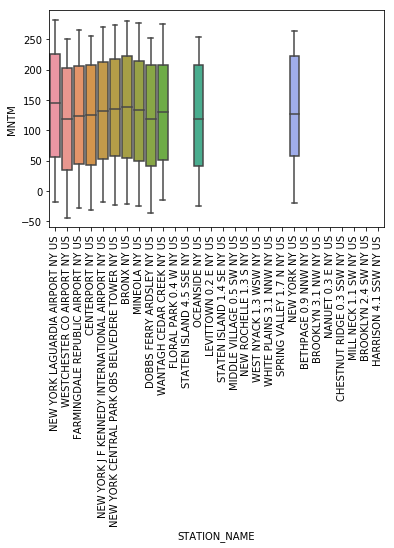

In [20]:
import seaborn as sns
g=sns.boxplot(y='MNTM', x='STATION_NAME', data=ghcn, 
             order=ghcn['STATION_NAME'].value_counts().keys())
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Potentially we could have filtered out the stations which had no measurements. Now lets examine the dates.

## Fixing Dates

The dates read from the csv file are just formated as ints. We print out the first 5 to learn the format:

In [21]:
ghcn['DATE'].head()

0    20050601
1    20050701
2    20050801
3    20050901
4    20051001
Name: DATE, dtype: int64

This gives us the opportunity to see how the formating works. It is year month then date. We specify the format in the 'to_datetime' method and this gives us a way to format this as date objects right into the pandas object.

In [22]:
ghcn['date']=pd.to_datetime(ghcn['DATE'],format='%Y%m%d')
# Note we keep "DATE" in its original form but just at a 'date' column of the new type
ghcn['date'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: date, dtype: datetime64[ns]

In [23]:
stations = dict(list(ghcn.groupby('STATION_NAME')))
print('\n'.join(stations.keys()))

BETHPAGE 0.9 NNW NY US
BRONX NY US
BROOKLYN 2.4 SW NY US
BROOKLYN 3.1 NW NY US
CENTERPORT NY US
CHESTNUT RIDGE 0.3 SSW NY US
DOBBS FERRY ARDSLEY NY US
FARMINGDALE REPUBLIC AIRPORT NY US
FLORAL PARK 0.4 W NY US
HARRISON 4.1 SSW NY US
LEVITTOWN 0.2 E NY US
MIDDLE VILLAGE 0.5 SW NY US
MILL NECK 1.1 SW NY US
MINEOLA NY US
NANUET 0.3 E NY US
NEW ROCHELLE 1.3 S NY US
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US
NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US
NEW YORK LAGUARDIA AIRPORT NY US
NEW YORK NY US
OCEANSIDE NY US
SPRING VALLEY 1.7 N NY US
STATEN ISLAND 1.4 SE NY US
STATEN ISLAND 4.5 SSE NY US
WANTAGH CEDAR CREEK NY US
WEST NYACK 1.3 WSW NY US
WESTCHESTER CO AIRPORT NY US
WHITE PLAINS 3.1 NNW NY US


Lets focus on one station and see if we can analyze the data across time. Let's look at the central park data at Belvedere castle. ![Belvedere Castle](https://upload.wikimedia.org/wikipedia/commons/1/1f/Belvedere_Castle%2C_Central_Park.jpg "Belvedere Castle")


In [45]:
cpd = stations['NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US']
cpd.head()

Now lets plot the data and see how the temperatures change over time.

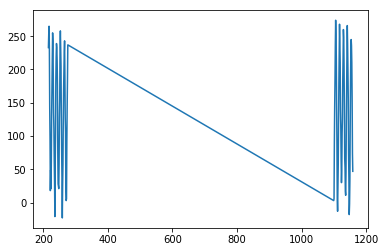

In [47]:
cpd['MNTM'].plot()

That doesn't look right! Why? Well the x-axis is just the pandas index and while we think that should be the time, it is just actually some arbitrary number that indexes the measure meant count. Some of the central pars reading show up toward the beginning and some toward the end. What we *really* need to do is make the index the **date** which we can do by setting the index:

In [48]:
cpd = cpd[['MNTM','date']].set_index('date')

Now the plot will show up correctly:

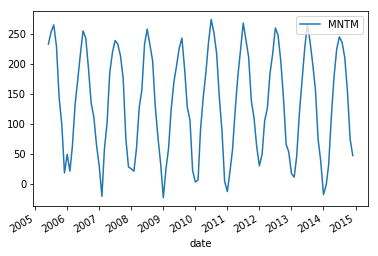

In [27]:
_=cpd.plot()

It is *important* to note that we do **not** choose a line plot over a scatter plot arbitrarily. A line plot should be used when the points between the data may be imagined to change continuously. In between a value for January and February 2009 we can *imagine* that if we had data for a point in the middle, that the measured value would have a value between the two values.

When it we are not imagining a continuous value of a continuous variable, we should use a bar graph, or a scatter plot or some other visualization.

## Lag Plots

When we have time series information and important idea is whether the values are independent. One way we can see if one value depends on the next is with a lag plot. Lag plots typically should be scatter plots. This is because we are comparing the statistical relationship between pairs of values, which is the traditional role of a scatter plot. If one variable is unrelated to another we would just see an unorganized cloud of points. Let's see what happens when we plot our temperatures with a lag of 1 (one month vs. the next).

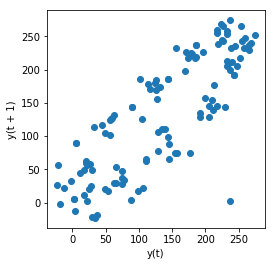

In [28]:
ax = pd.plotting.lag_plot(cpd['MNTM'],lag=1)
# To see the relationship clearly, we need equal spacing
# along the x and y axis
ax.set_aspect('equal')

Clearly we see the points organized in a lower and an upper line which meet at either end to form a narrow ellipse. This supports the idea that temperature for half the year follows a sequence of increases and for the other a sequence of decreases. As we change the lag we can see the pattern of the seasonality emerging.

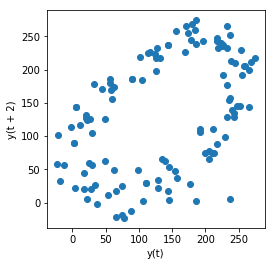

In [29]:
ax = pd.plotting.lag_plot(cpd['MNTM'],lag=2)
ax.set_aspect('equal')

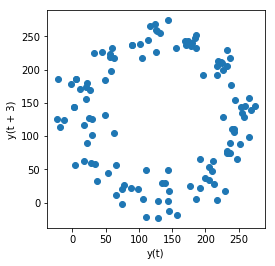

In [30]:
ax = pd.plotting.lag_plot(cpd['MNTM'],lag=3)
ax.set_aspect('equal')

At a lag of 3 we see we have reached the most circular version.

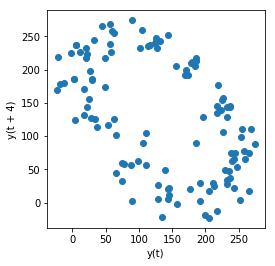

In [31]:
ax = pd.plotting.lag_plot(cpd['MNTM'],lag=4)
ax.set_aspect('equal')

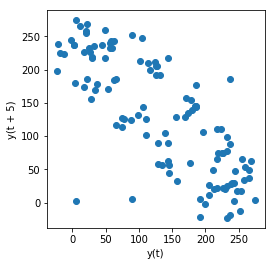

In [32]:
ax= pd.plotting.lag_plot(cpd['MNTM'],lag=5)
ax.set_aspect('equal')

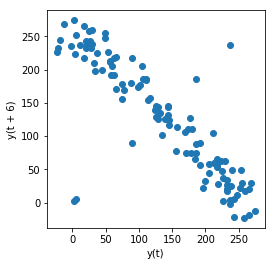

In [33]:
ax= pd.plotting.lag_plot(cpd['MNTM'],lag=6)
ax.set_aspect('equal')

This analysis confirms that there is a yearly cycle (12 months) since it returns to almost the same graph as the circular structure collapses when we look at the 12 month lag but instead we see a pretty solid linear relationship between one year temperature and the next:

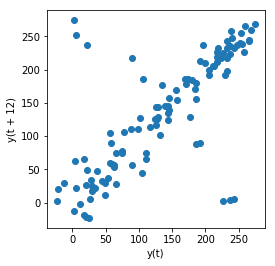

In [34]:
ax= pd.plotting.lag_plot(cpd['MNTM'],lag=12)
ax.set_aspect('equal')

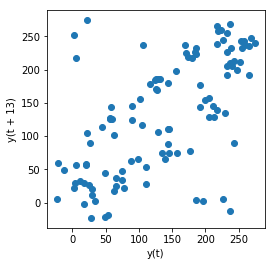

In [35]:
ax= pd.plotting.lag_plot(cpd['MNTM'],lag=13)
ax.set_aspect('equal')

With the circular structure reappearing after we return to 13. 

## Removing Seasonality

Because of this obvious seasonality we might remove the seasonality to look at the anomaly which is the difference between the seasonal average. One way we could approach this is to skip 12 months and average.


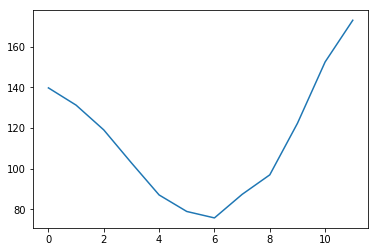

In [37]:
seasonal_means = np.array([np.mean(cpd['MNTM'][month:12:].values) for month in range(12)])
plt.plot(seasonal_means)

The obvious problem here is we lose the month. We seem to be starting randomly at some month and month 6 is almost certainly a winter month like Dec or January. Let's instead use the 'date' variable. We will create a row that has the month in it using the index. Then we will compute the 12 monthly means by picking out each row which matches the month.

In [87]:
#add a month row
cpd['month'] = [date.month for date in cpd.index]
#compute the monthly means 
monthly_means = [cpd[cpd['month']==month]['MNTM'].mean() for month in range(1,13)]

We will drop back in the seasonal mean as a seasonal_means column. Finally the anomoly is the difference of the monthly mean ('MNTM') to the mean of the monthly means over the whole data set. We make a column for that too.

In [96]:
#create on seasonal mean for each index (dates indexed at 1 so must -1)
cpd_seasonal_means = [monthly_means[date.month-1] for date in cpd.index ]
cpd['seasonal_means'] = cpd_seasonal_means
cpd['anomoly']=cpd['MNTM']-cpd['seasonal_means']

Finally we plot some to see if there is a trend.

Text(0.5, 1.0, 'Recent Januarys')

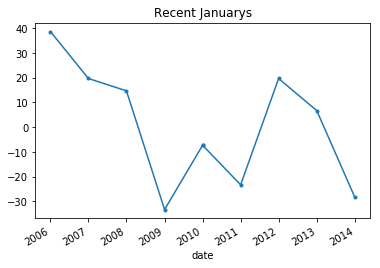

In [92]:
ax=cpd[cpd['month']==1]['anomoly'].plot(marker='.')
ax.set_title('Recent January Anomolies')

Text(0.5, 1.0, 'Recent January Anomolies')

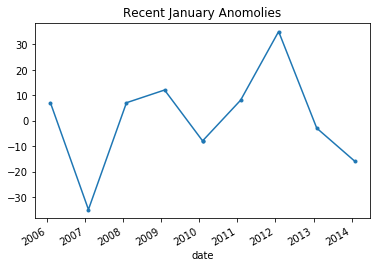

In [93]:
ax=cpd[cpd['month']==2]['anomoly'].plot(marker='.')
ax.set_title('Recent January Anomolies')

Text(0.5, 1.0, 'Recent January Anomolies')

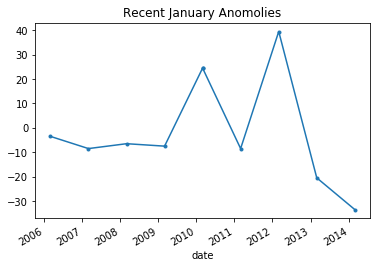

In [94]:
ax=cpd[cpd['month']==3]['anomoly'].plot(marker='.')
ax.set_title('Recent March Anomolies')

Text(0.5, 1.0, 'Recent August Anomolies')

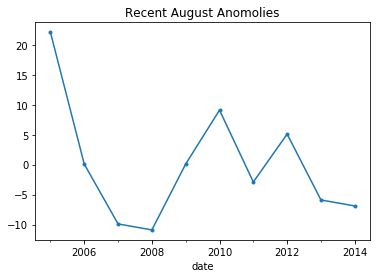

In [95]:
ax=cpd[cpd['month']==8]['anomoly'].plot(marker='.')
ax.set_title('Recent August Anomolies')

cpd[cpd['month']==1].mean()

Looking at this it is hard to conclude anything for the time between 2006 and 2014. We don't see a significant trend over 8 years at the central park station. There may be many reasons for this but in general the fluctuations over such a short time period, and only one station are much larger than any trend.